In [170]:
%run 02_data-cleaning.ipynb

                    date   PopulationName        lat         lon    biomass  \
0    2016-04-20 07:00:00  Prochlorococcus  21.520326 -158.326984  10.520443   
1    2016-04-20 07:00:00    Synechococcus  21.520326 -158.326984   0.341429   
2    2016-04-20 07:00:00      non_pro_syn  21.520326 -158.326984   3.338212   
3    2016-04-20 07:00:00      non_pro_syn  21.520326 -158.326984   0.701902   
4    2016-04-20 08:00:00  Prochlorococcus  21.662710 -158.323430   9.309387   
...                  ...              ...        ...         ...        ...   
6896 2019-04-29 16:00:00      non_pro_syn  23.491830 -158.000200   1.678707   
6897 2019-04-29 17:00:00  Prochlorococcus  23.295040 -158.001120   6.017184   
6898 2019-04-29 17:00:00    Synechococcus  23.295040 -158.001120   0.558076   
6899 2019-04-29 17:00:00      non_pro_syn  23.295040 -158.001120   2.741156   
6900 2019-04-29 17:00:00      non_pro_syn  23.295040 -158.001120   1.548825   

          salin       temp cruisename        NO3NO2

# Developing a Random Forest Regressor for Each Population to Predict Biomass (pgC per L)

## Functions:

In [202]:
#function to make numpy array
def to_np(pop_feat):
    pop_feat = np.array(pop_feat)
    return pop_feat



In [203]:
model_data

,date,PopulationName,lat,lon,biomass,salin,temp,cruisename,NO3NO2,PO4,Fe,SiO4,Satellite_CHL
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
2,2016-04-20 07:00:00,non_pro_syn,21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
3,2016-04-20 07:00:00,non_pro_syn,21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.035360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,2023-02-26 11:20:00,Prochlorococcus,20.791500,-157.702450,1.378268,34.947910,24.581220,TN413,7.313388e-04,0.198196,0.000347,2.046753,0.069791
7987,2023-03-08 04:10:00,non_pro_syn,-5.896500,-179.343700,11.849405,35.659010,29.075130,TN413,1.527741e-03,0.519499,0.000009,2.992112,0.088274
7988,2023-02-28 19:50:00,non_pro_syn,13.914000,-167.738300,4.722555,34.446510,26.227920,TN413,7.691157e-04,0.224454,0.000020,2.254536,0.045945
7989,2023-02-28 18:40:00,Synechococcus,14.046300,-167.553600,0.087319,34.467610,26.286360,TN413,7.480014e-04,0.222924,0.000020,2.246549,0.046282


## Seperating dataframes for individual populations

In [204]:
# g = sns.pairplot(
#     tn413.drop(['cell_abundance', 'cell_diameter', 'depth', 'date', 'lon'], axis=1),
#     hue='PopulationName')
# g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
#                fontsize = 14, # defining the size of the title
#                y=1.05)

In [205]:
model_data.PopulationName.unique()

array(['Prochlorococcus', 'Synechococcus', 'non_pro_syn'], dtype=object)

In [206]:
import numpy as np
#function to make numpy array
def to_np(pop_feat):
    pop_feat = np.array(pop_feat)
    return pop_feat

In [207]:
pro_model_data = model_data[model_data.PopulationName == 'Prochlorococcus']
syn_model_data = model_data[model_data.PopulationName == 'Synechococcus']
non_model_data = model_data[model_data.PopulationName == 'non_pro_syn']


pop_model_data_list = [pro_model_data, syn_model_data, non_model_data]
# creating the labels for all of the populations for biomass (using numpy array so we can predict on them)

label_pro = np.array(pro_model_data.biomass)
label_syn = np.array(syn_model_data.biomass)
label_non = np.array(non_model_data.biomass)

# Creating the features for all of the populations

#these are the dropped features
droped_features = ['date','PopulationName',
                   'biomass', 'SiO4', 'cruisename', 'lat', 'lon']

features_pro = pro_model_data.drop(droped_features, axis = 1)
features_syn = syn_model_data.drop(droped_features, axis = 1)
features_non = non_model_data.drop(droped_features, axis = 1)


# Saving feature names for later use (doesn't matter which dataframe we use since they all have same column names)
feature_list = list(features_pro.columns)
# Convert to numpy array
pop_features = [features_pro,features_syn,features_non]


features_pro = to_np(features_pro)
features_syn = to_np(features_syn)
features_non = to_np(features_non)

#creating labels to see how the model did
label_pro = np.array(pro_model_data.biomass)
label_syn = np.array(syn_model_data.biomass)
label_non = np.array(non_model_data.biomass)

In [208]:
#loading packages for random forest modeling

from sklearn.model_selection import train_test_split
import joblib

## RF Regressor for Prochlorococcus

In [209]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features_pro, test_features_pro, train_labels_pro, test_labels_pro = train_test_split(features_pro, label_pro, test_size = 0.25, random_state = 42)

In [210]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_pro.shape)
print('Training Labels Shape:', train_labels_pro.shape)
print('Testing Features Shape:', test_features_pro.shape)
print('Testing Labels Shape:', test_labels_pro.shape)

Training Features Shape: (1272, 6)
Training Labels Shape: (1272,)
Testing Features Shape: (424, 6)
Testing Labels Shape: (424,)


In [211]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_pro= RandomForestRegressor(n_estimators = 120, random_state = 42)
# Use the Training data to build the model
rf_pro.fit(train_features_pro, train_labels_pro)
#saving the model
joblib.dump(rf_pro, "/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_pro.joblib")

['/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_pro.joblib']

### Predicting and Testing for Prochlorococus

In [212]:
# Use the forest's predict method on the test data
predictions_pro = rf_pro.predict(test_features_pro)
# Calculate the absolute errors
errors = abs(predictions_pro - test_labels_pro)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_pro, predictions_pro)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
mape = np.mean(100 * (errors / test_labels_pro))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.73 pgC per L.
Accuracy: 79.33 %.


In [213]:
feature_list

['salin', 'temp', 'NO3NO2', 'PO4', 'Fe', 'Satellite_CHL']

In [214]:
# Get numerical feature importances
importances = list(rf_pro.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

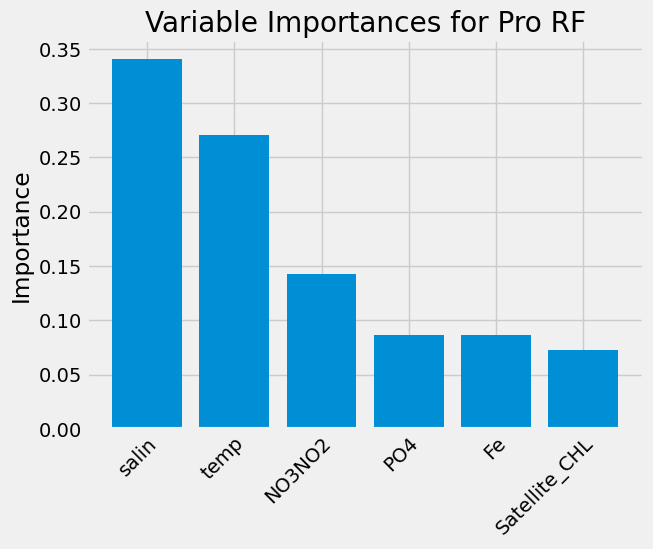

In [215]:
pro_feature_importance = pd.DataFrame(rf_pro.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=pro_feature_importance.index,height=pro_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(pro_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_actual_and_predicted_values(features, feature_list, label, test_features, predictions, title):
    # latitudes of training values
    lat = features[:, feature_list.index('lat')]
    # Dataframe with true values and dates
    true_data = pd.DataFrame(data={'lat': lat, 'actual': label})
    # latitudes of predictions
    test_lats = test_features[:, feature_list.index('lat')]
    # Dataframe with predictions and dates
    predictions_data = pd.DataFrame(data={'lat': test_lats, 'prediction': predictions})

    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Plot the actual values as a blue line
    ax.plot(true_data['lat'], true_data['actual'], linewidth=2, color='blue', label='Actual')

    # Plot the predicted values as red dots
    ax.plot(predictions_data['lat'], predictions_data['prediction'], 'ro', markersize=4, label='Prediction')

    # Set x-axis tick rotation
    ax.tick_params(axis='x', rotation=60)

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.5)

    # Set axis labels
    ax.set_xlabel('Latitude (º)')
    ax.set_ylabel('Biomass (pgC per L)')

    # Set the title
    ax.set_title(title)

    # Add a legend
    ax.legend()

    # Display the plot
    plt.show()


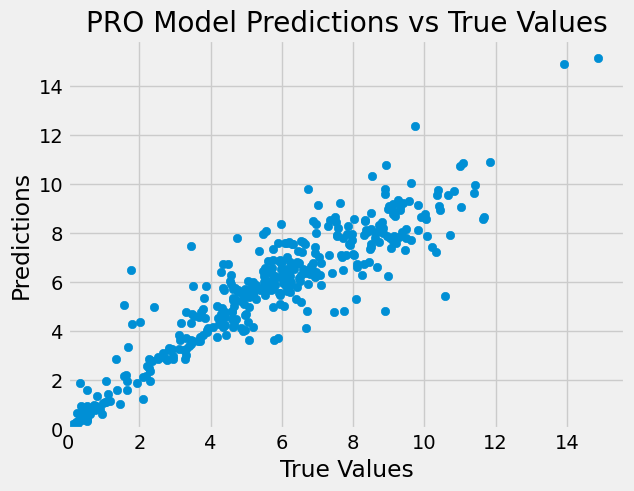

In [217]:
fig, ax = plt.subplots()
ax.scatter(test_labels_pro, predictions_pro)
ax.set_title('PRO Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()

# run the model on each individual populaton - see which does best
#put zero values when 

## training and Testing SYN

In [218]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets"
train_features_syn, test_features_syn, train_labels_syn, test_labels_syn = train_test_split(features_syn, label_syn, test_size = 0.20, random_state = 42)

In [219]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_syn.shape)
print('Training Labels Shape:', train_labels_syn.shape)
print('Testing Features Shape:', test_features_syn.shape)
print('Testing Labels Shape:', test_labels_syn.shape)

Training Features Shape: (1745, 6)
Training Labels Shape: (1745,)
Testing Features Shape: (437, 6)
Testing Labels Shape: (437,)


In [220]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_syn = RandomForestRegressor(n_estimators = 120, random_state = 42)
# Use the Training data to build the model
rf_syn.fit(train_features_syn, train_labels_syn);
#saving the model
joblib.dump(rf_syn, "/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_syn.joblib")

['/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_syn.joblib']

In [221]:
# Use the forest's predict method on the test data
predictions_syn = rf_syn.predict(test_features_syn)
# Calculate the absolute errors
errors = abs(predictions_syn - test_labels_syn)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_syn, predictions_syn)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
mape = np.mean(100 * (errors / test_labels_syn))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.46 pgC per L.
Accuracy: -116.14 %.


In [191]:
# Get numerical feature importances
importances = list(rf_syn.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

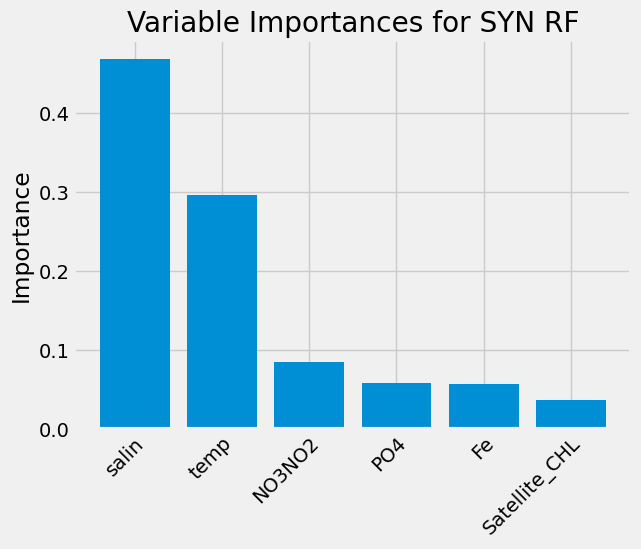

In [192]:
syn_feature_importance = pd.DataFrame(rf_syn.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=syn_feature_importance.index,height=syn_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(syn_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for SYN RF');

(0.0, 15.9769117794)

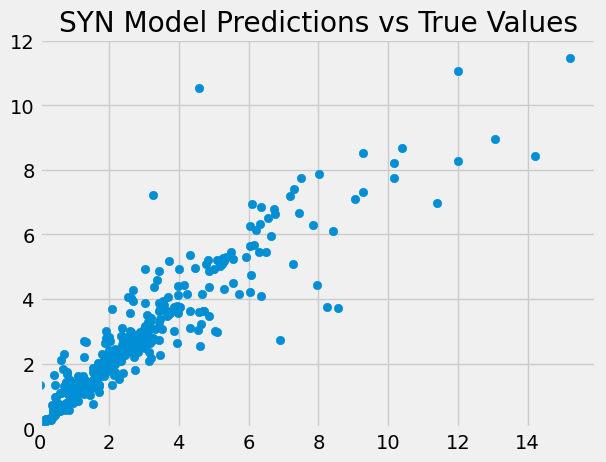

In [193]:
fig, ax = plt.subplots()
ax.scatter(test_labels_syn, predictions_syn)
ax.set_title('SYN Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)


# run the model on each individual populaton - see which does best
#put zero values when 

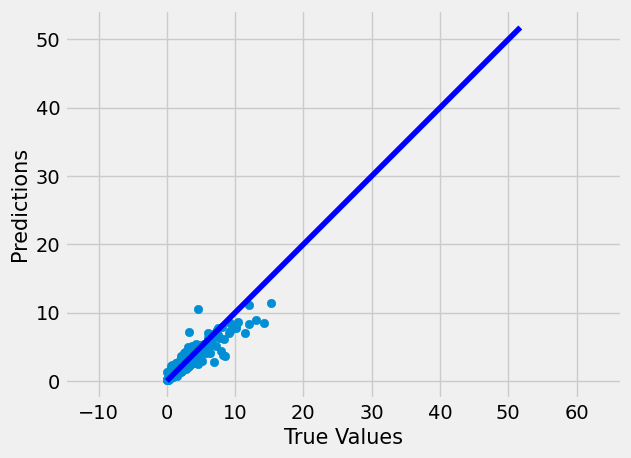

In [194]:
# plot_actual_and_predicted_values(features_syn, feature_list, label_syn, test_features_syn, predictions_syn, 
#                                 title ='Actual and Predicted Values of Synechococcus Biomass')

fig, ax = plt.subplots()
ax.scatter(test_labels_syn, predictions_syn)


p1 = max(max(predictions_syn), max(label_syn))
p2 = min(min(predictions_syn), min(label_syn))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## RF Regressor for Non Pro or Syn

In [195]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets"
train_features_non, test_features_non, train_labels_non, test_labels_non = train_test_split(features_non, label_non, test_size = 0.20, random_state = 42)

In [196]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_non.shape)
print('Training Labels Shape:', train_labels_non.shape)
print('Testing Features Shape:', test_features_non.shape)
print('Testing Labels Shape:', test_labels_non.shape)

Training Features Shape: (3290, 6)
Training Labels Shape: (3290,)
Testing Features Shape: (823, 6)
Testing Labels Shape: (823,)


In [197]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_non = RandomForestRegressor(n_estimators = 120, random_state = 42)
# Use the Training data to build the model
rf_non.fit(train_features_non, train_labels_non);
joblib.dump(rf_non, "/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_non_pro_syn.joblib")

['/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_non_pro_syn.joblib']

In [198]:
# Use the forest's predict method on the test data
predictions_non = rf_non.predict(test_features_non)
# Calculate the absolute errors
errors = abs(predictions_non - test_labels_non)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_non, predictions_non)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels_non)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.97 pgC per L.
Accuracy: -33.6 %.


In [199]:
# Get numerical feature importances
importances = list(rf_non.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

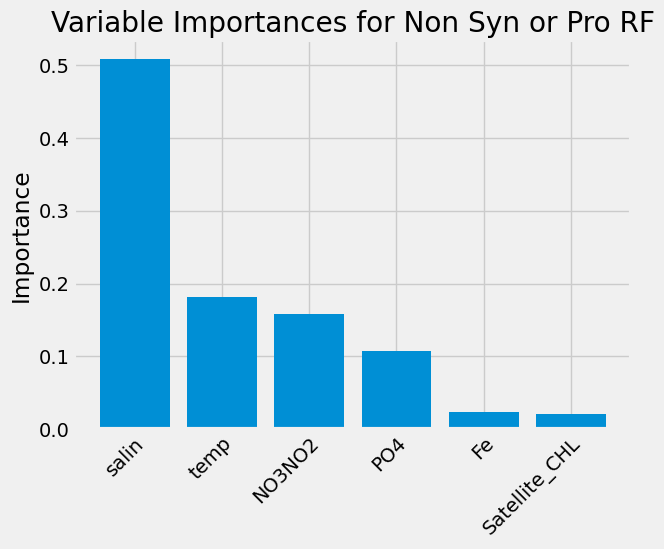

In [200]:
non_feature_importance = pd.DataFrame(rf_non.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=non_feature_importance.index,height=non_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(non_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Non Syn or Pro RF');

(0.0, 49.565989147050004)

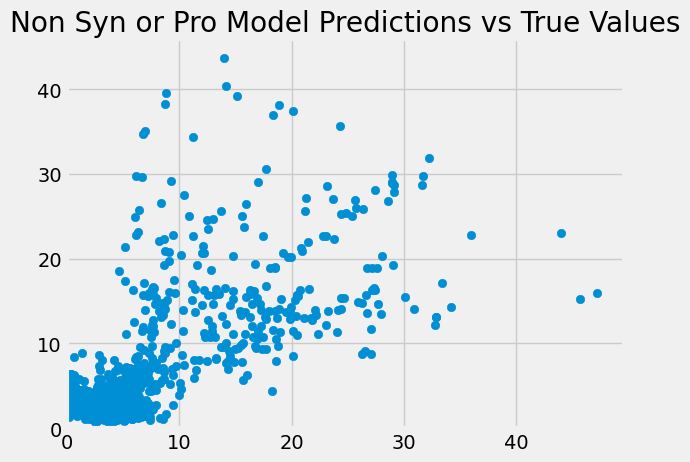

In [201]:
fig, ax = plt.subplots()
ax.scatter(test_labels_non, predictions_non)
ax.set_title('Non Syn or Pro Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)


# run the model on each individual populaton - see which does best
#put zero values when 